# 1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/heart_disease.csv') #index_col = 0

#df = pd.read_csv('/content/heart_disease.csv')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# 2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
df.describe()   ## Check for outliers  (75% and max)

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
missing_values = df.isna().sum()  #df.isnull()   # Check for missing values
missing_values

# summary_stats = df.describe()
# missing_values, summary_stats

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

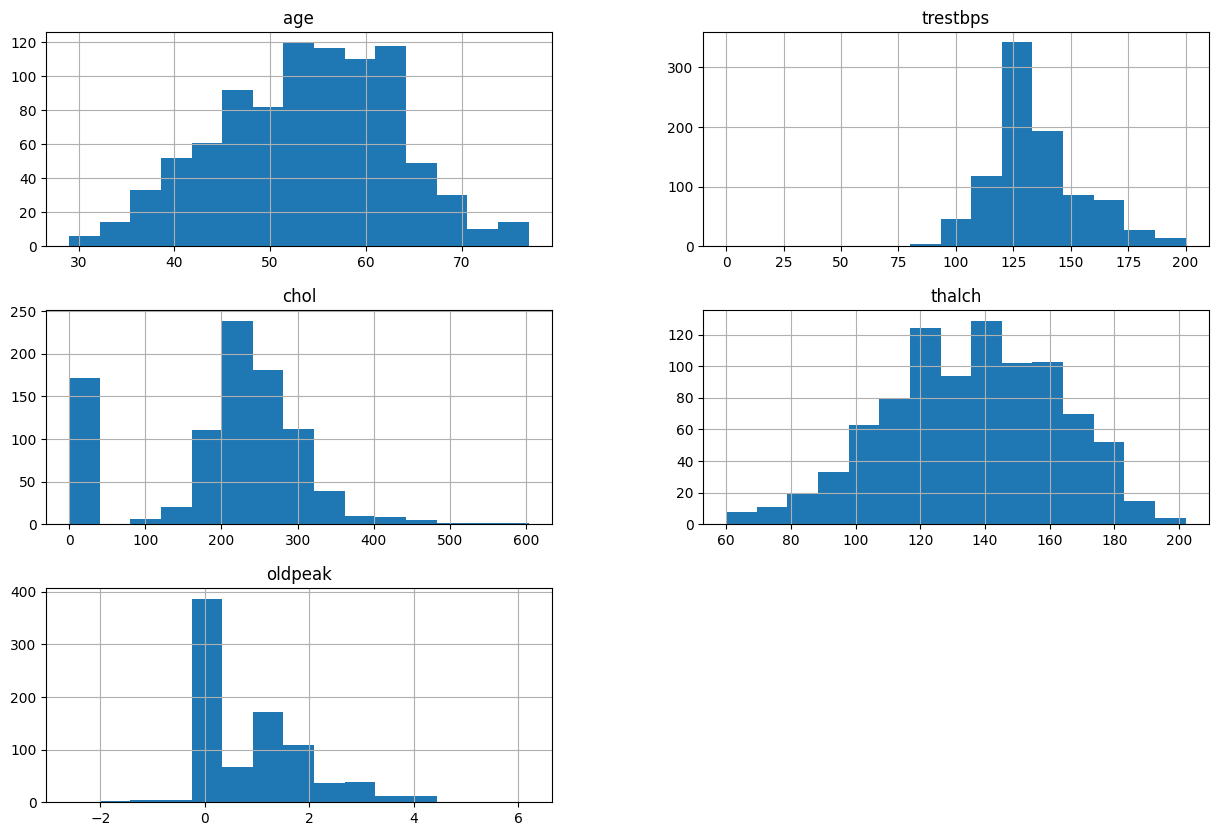

In [ ]:
          # Histograms for numeric features.
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))

# numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
# df[numeric_features].hist(figsize = (15,10), bins = 15, )

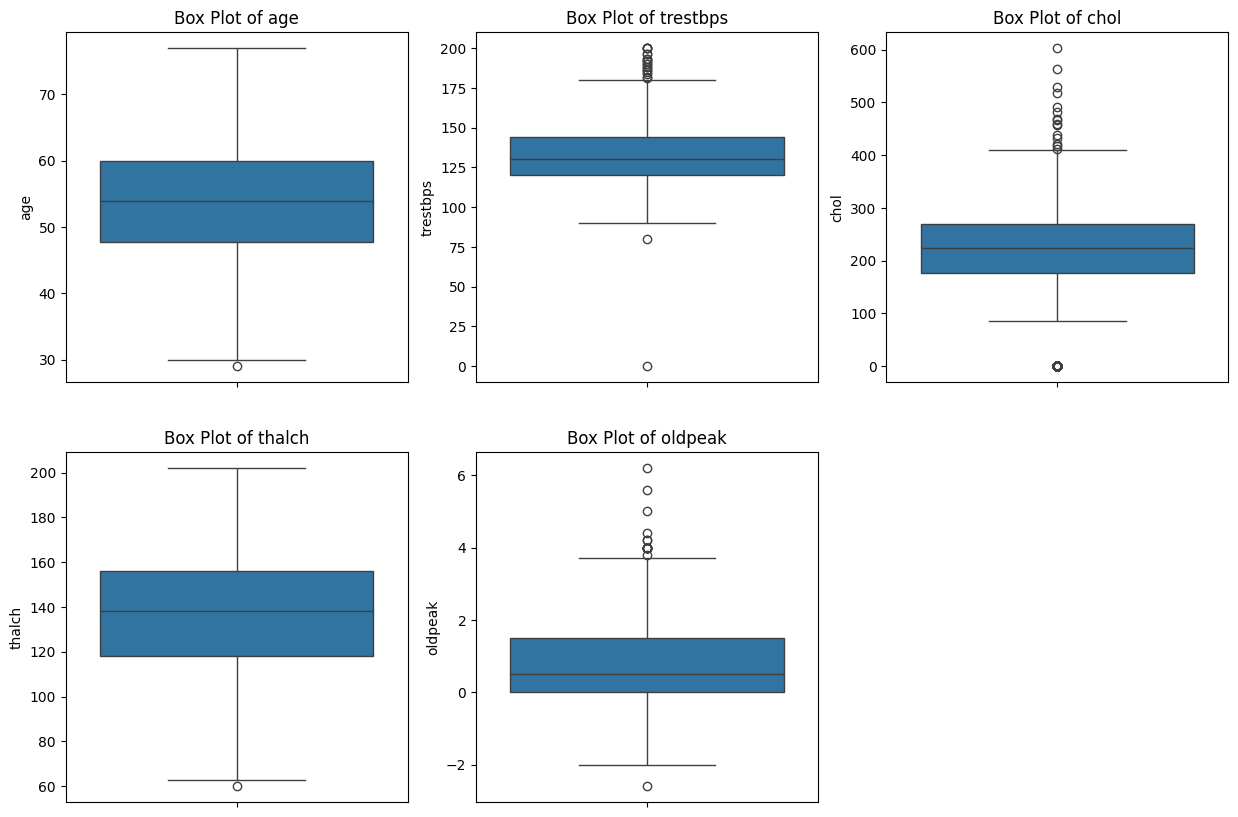

In [ ]:
          # Box Plot.

plt.figure(figsize = (15,10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')

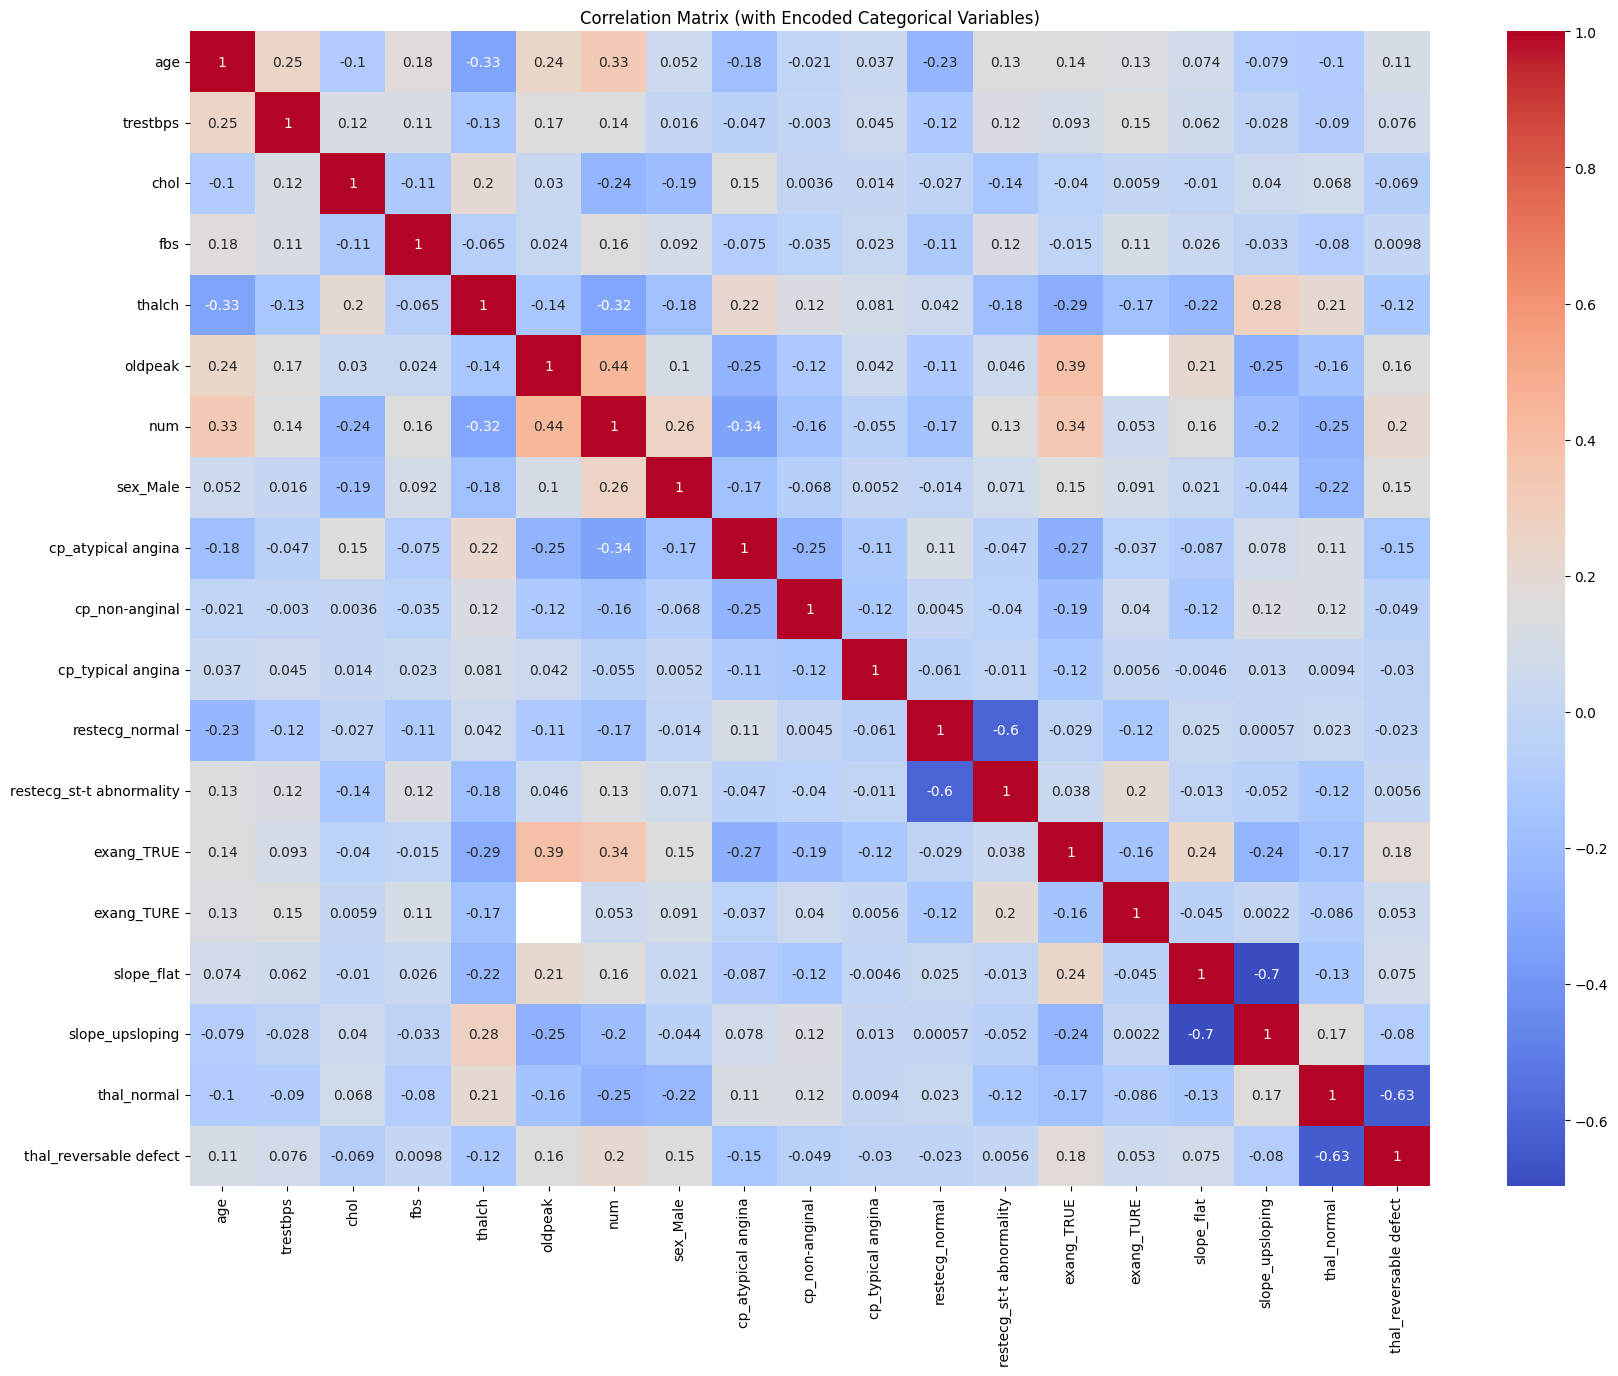

In [30]:
          # Correlation matrix
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

#correlation_matrix_encoded = df_encoded.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (with Encoded Categorical Variables)')
plt.show()

# 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [26]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [25]:
          # Encode categorical variables using one-hot encoding.

df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [31]:
df.select_dtypes(include=['int']).columns

Index(['age', 'trestbps', 'chol', 'thalch', 'num'], dtype='object')

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'num']
scaler = StandardScaler()   # Initialize the scaler
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])    # Scaling numerical features

In [33]:
          # Handing Missing Values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace = True)  # Fill missing values in the 'oldpeak' column with the median

# 4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [47]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)  # Features
y = df_encoded['num']               # Target variable

X = X.apply(lambda x: x.fillna(x.median()), axis=0)                                        # Check for missing values and fill with median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the dataset into training and testing sets


In [68]:
df['num'] = df['num'].astype(int)     # target variable 'num' is treated as categorical

In [69]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)     # Train the model on the training
y_pred = clf.predict(X_test)  # Make predictions on the testing

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score   # Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.48
Precision: 0.47
Recall: 0.48
F1-score: 0.47
ROC-AUC: 0.59


# 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model.

Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {                                # Define the parameter grid
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

In [74]:
clf = DecisionTreeClassifier(random_state=40)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,cv=5, scoring='accuracy')#, n_jobs=-1)  #GridSearchCV with cross-validation
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameter: {best_params}')

Best hyperparameter: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30}


In [75]:
best_clf = grid_search.best_estimator_

y_pred_best = best_clf.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy (Best Model): {accuracy_best:.2f}')
print(f'Precision (Best Model): {precision_best:.2f}')
print(f'Recall (Best Model): {recall_best:.2f}')
print(f'F1-score (Best Model): {f1_best:.2f}')
print(f'ROC-AUC (Best Model): {roc_auc_best:.2f}')

Accuracy (Best Model): 0.53
Precision (Best Model): 0.48
Recall (Best Model): 0.53
F1-score (Best Model): 0.50
ROC-AUC (Best Model): 0.65


# 6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [76]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy (Best Model): {accuracy_best:.2f}')
print(f'Precision (Best Model): {precision_best:.2f}')
print(f'Recall (Best Model): {recall_best:.2f}')
print(f'F1-score (Best Model): {f1_best:.2f}')
print(f'ROC-AUC (Best Model): {roc_auc_best:.2f}')

Accuracy (Best Model): 0.53
Precision (Best Model): 0.48
Recall (Best Model): 0.53
F1-score (Best Model): 0.50
ROC-AUC (Best Model): 0.65


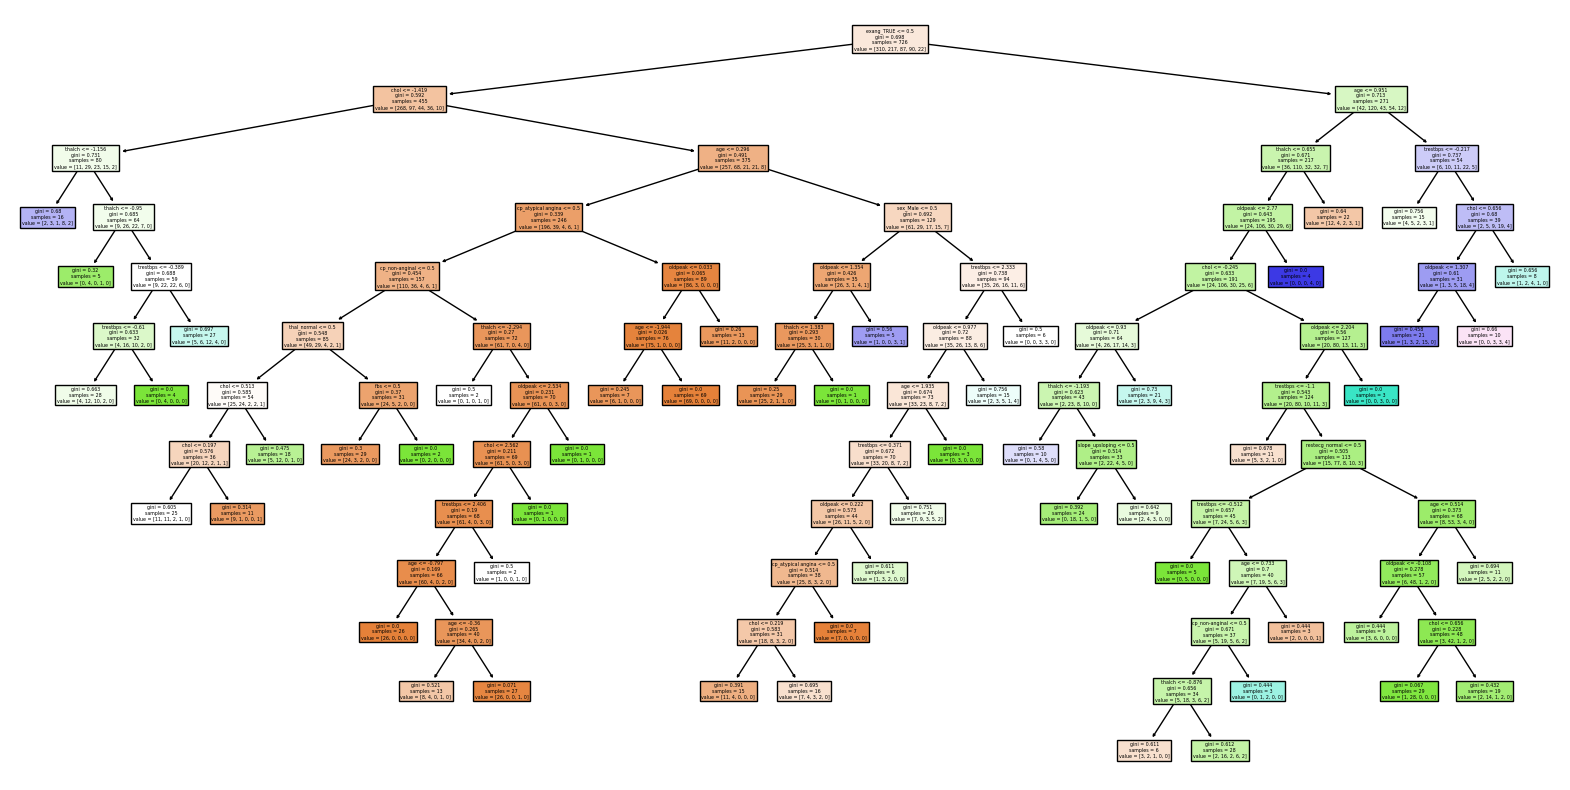

|--- exang_TRUE <= 0.50
|   |--- chol <= -1.42
|   |   |--- thalch <= -1.16
|   |   |   |--- class: 3
|   |   |--- thalch >  -1.16
|   |   |   |--- thalch <= -0.95
|   |   |   |   |--- class: 1
|   |   |   |--- thalch >  -0.95
|   |   |   |   |--- trestbps <= -0.39
|   |   |   |   |   |--- trestbps <= -0.61
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  -0.61
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- trestbps >  -0.39
|   |   |   |   |   |--- class: 2
|   |--- chol >  -1.42
|   |   |--- age <= 0.30
|   |   |   |--- cp_atypical angina <= 0.50
|   |   |   |   |--- cp_non-anginal <= 0.50
|   |   |   |   |   |--- thal_normal <= 0.50
|   |   |   |   |   |   |--- chol <= 0.51
|   |   |   |   |   |   |   |--- chol <= 0.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- chol >  0.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- chol >  0.51
|   |   |   |   |   |   |   |--- class: 1
|   |   

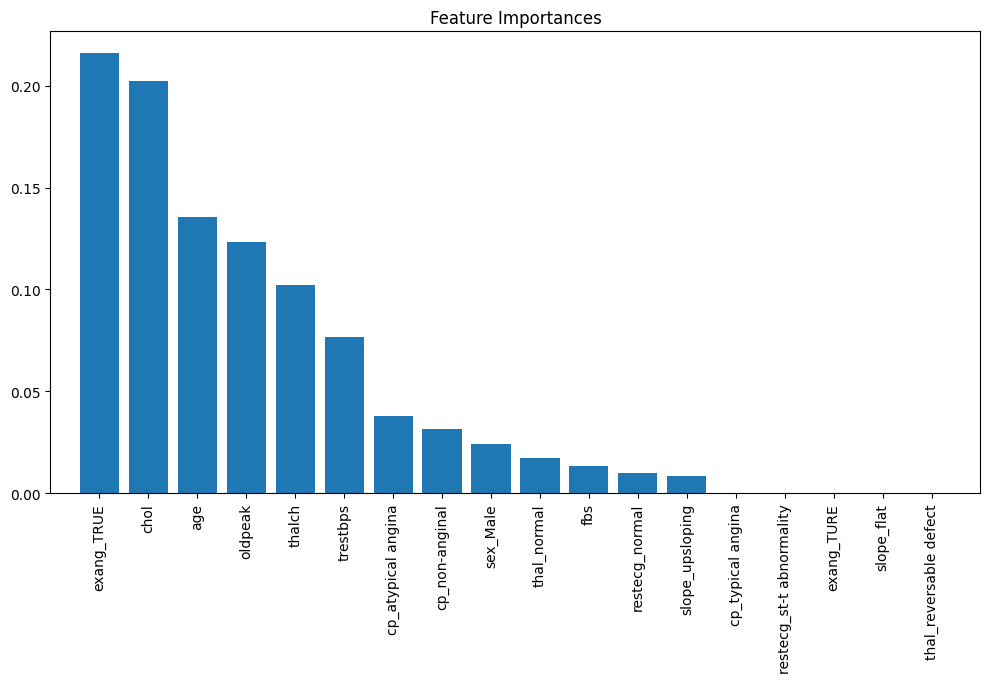

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(20,10))         # Visualize the decision tree
plot_tree(best_clf, feature_names=X.columns, filled=True)
plt.show()

tree_rules = export_text(best_clf, feature_names=list(X.columns))
print(tree_rules)                  # Print the decision rules

importances = best_clf.feature_importances_     # Bar Plot feature importances
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

 Common Hyperparameters of Decision Tree Models -

  1) min_samples_leaf - The minimum number of samples required to be at a leaf node.
  
  2) min_samples_split - The minimum number of samples required to split an internal node.
  
  3) min_impurity_decrease - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

  4) criterion - The function to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain).

  5) max_leaf_nodes - The maximum number of leaf nodes in the tree.

  6) max_depth - The maximum depth of the tree.

  7) max_features - The number of features to consider when looking for the best split.

  Their Effects on model performance -

  Overfitting: Occurs when the model learns the training data too well, capturing noise and outliers. Hyperparameters like max_depth, min_samples_split, min_samples_leaf, and max_leaf_nodes help control overfitting by limiting the complexity of the tree.

  Underfitting: Happens when the model is too simple to capture the underlying patterns in the data. Setting hyperparameters to less restrictive values (e.g., allowing deeper trees with max_depth and more splits with min_samples_split) can help avoid underfitting.

  Bias-Variance Tradeoff: Hyperparameters affect the bias-variance tradeoff. Restrictive settings (e.g., shallow trees) lead to high bias and low variance, while less restrictive settings (e.g., deep trees) lead to low bias and high variance. Tuning hyperparameters helps balance this tradeoff for optimal performance.
  
  

2. What is the difference between the Label encoding and One-hot encoding?

**Label Encoding -**

Description - Assigns each unique category value an integer.

Example	-	“India” - 0  “Japan” - 1  “USA” - 2

When to Use	-	Ordinal categorical features. Large number of unique categories.

Advantages -	Simple and efficient for ordinal data. Does not increase dimensionality.

Disadvantages	-	Imposes an arbitrary order on non-ordinal data. Model might assume false relationships.

**One-Hot Encoding -**

Description -	Converts each unique category value into a new binary column.

Example	- "India” - [ 1, 0, 0 ]  “Japan” - [ 0, 1, 0 ]  “USA” - [ 0, 0, 1 ]

When to Use - 	Non-ordinal categorical features. Manageable number of unique categories.

Advantages -	Prevents the model from assuming any inherent order.

Disadvantages -	Can lead to high dimensionality with many unique categories.
